In [1]:
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [2]:
def draw_edge(tree, edge, color, curvature, edge_label = '', edge_width = 2, linestyle = '--'):
    nx.draw_networkx_edges(
        tree, 
        pos = pos, 
        edgelist = [edge],  
        edge_color = color,
        connectionstyle=f'arc3,rad={curvature}', 
        arrowstyle = '-',
        style = linestyle,
        width = edge_width
    )
    nx.draw_networkx_edge_labels(tree, pos = pos, edge_labels = {edge: edge_label}, font_size = 12, font_color = 'C0', bbox = dict(alpha=0))

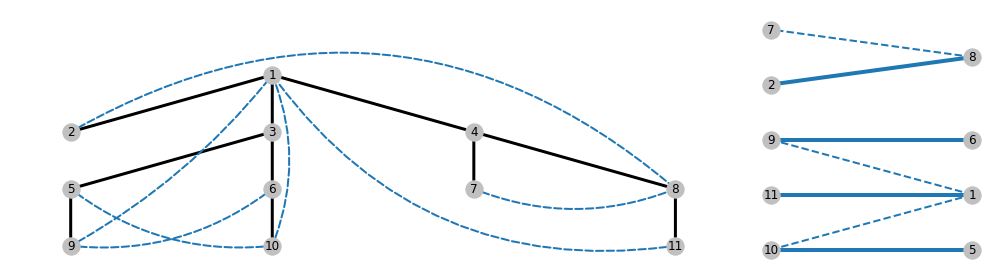

In [5]:
fig, ax = plt.subplots(1,2,tight_layout = True, gridspec_kw={'width_ratios': [3, 1]})
fig.set_size_inches(14, 4)

plt.sca(ax[0])
plt.axis('off')
tree = nx.Graph([(1,2), (1,3), (1,4), (3,5), (3,6), (5,9), (6,10), (4,7), (4,8), (8,11)])

directed_tree = nx.bfs_tree(tree, 1)
pos = graphviz_layout(directed_tree, prog="dot")
nx.draw_networkx(
    directed_tree,
    pos = pos,
    edge_color = 'black',
    node_color = 'silver',
    arrowstyle = '-',
    width = 3,
    with_labels = True
)


draw_edge(directed_tree, (2,8), 'C0', -0.35)
draw_edge(directed_tree, (9,1), 'C0', 0.1)
draw_edge(directed_tree, (9,6), 'C0', 0.2)
draw_edge(directed_tree, (10,5), 'C0', -0.2)
draw_edge(directed_tree, (10,1), 'C0', 0.2)
draw_edge(directed_tree, (7,8), 'C0', 0.2)
draw_edge(directed_tree, (11,1), 'C0', -0.3)


plt.sca(ax[1])
plt.axis('off')
bipartite_graph = nx.Graph([(2,8), (9,1), (9,6), (10,5), (10,1), (7,8), (11,1)])
pos = {
    10: (0,0),
    11: (0,1),
    9: (0,2),
    2: (0,3),
    7: (0,4),
    5: (1,0),
    1: (1,1),
    6: (1,2),
    8: (1,3.5)
}
nx.draw_networkx(
    bipartite_graph,
    pos = pos,
    edge_color = 'C0',
    node_color = 'silver',
    arrowstyle = '-',
    style = '--',
    width = 2,
    with_labels = True
)

draw_edge(bipartite_graph, (10,5), 'C0', 0, edge_label = '', edge_width = 4, linestyle = '-')
draw_edge(bipartite_graph, (11,1), 'C0', 0, edge_label = '', edge_width = 4, linestyle = '-')
draw_edge(bipartite_graph, (9,6), 'C0', 0, edge_label = '', edge_width = 4, linestyle = '-')
draw_edge(bipartite_graph, (2,8), 'C0', 0, edge_label = '', edge_width = 4, linestyle = '-')



plt.savefig('../report_images/tree_examples/leaf_distance_matching_example.png', dpi = 200)
plt.show()